# Setup

## Download Data

In [567]:
startDate = '2024-01-01' #inclusive
endDate = '2025-01-01' #not inclusive
interval = '1d'

In [568]:
import yfinance as yf
import pandas as pd
import numpy as np
# Get a list of S&P 500 tickers from Wikipedia
sp500_url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
sp500 = pd.read_html(sp500_url)[0]
tickers = sp500['Symbol'].tolist()
# Handle tickers with periods (e.g., BRK.B) for yfinance
tickers = [t.replace('.', '-') for t in tickers]
# Download historical data for tickers
data = yf.download(tickers, start=startDate, end=endDate, interval=interval, auto_adjust=True)["Close"]
data


[*********************100%***********************]  502 of 502 completed


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-02,137.212799,184.290421,151.344742,134.479996,106.644485,71.840385,338.308868,580.070007,188.667374,68.742882,...,235.638168,33.541061,93.076859,60.114231,97.210670,111.724838,125.302650,119.786537,267.980011,193.402954
2024-01-03,129.706894,182.910492,151.950806,133.419998,106.324120,73.162132,329.532288,571.789978,184.164612,69.092461,...,236.305954,32.837269,92.516029,60.218414,98.027405,109.650940,125.370644,118.878677,252.520004,189.821594
2024-01-04,129.548645,180.587540,152.897781,133.720001,107.741524,73.666107,328.722900,567.049988,181.347946,67.788651,...,235.186417,32.384136,92.693138,60.360481,97.172684,110.407776,124.972481,118.612244,252.970001,190.913696
2024-01-05,129.113541,179.862839,153.541702,135.979996,107.566765,73.038513,328.264557,564.599976,181.815765,66.900558,...,234.577576,32.470905,94.109955,60.360481,97.467087,110.230850,124.632584,118.395164,252.690002,191.710648
2024-01-08,131.902313,184.210983,152.869354,140.080002,109.120079,73.333298,331.901978,580.549988,184.184097,67.136757,...,237.818283,32.827625,95.487419,60.218414,95.843109,110.918861,124.923920,120.358871,261.089996,192.989700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,135.276031,257.578674,176.685593,134.990005,113.634544,92.669998,358.322815,447.940002,216.161057,49.560802,...,313.332672,28.063620,88.309021,66.534340,104.494308,117.409760,133.709183,106.553841,395.440002,163.651352
2024-12-26,135.007645,258.396667,175.900314,135.320007,114.139534,92.930000,357.133789,450.160004,216.131317,49.541222,...,315.156952,27.974245,88.836212,66.505081,104.582695,117.727753,134.699615,106.504189,396.850006,164.466125
2024-12-27,134.719391,254.974930,174.732224,133.384995,113.862289,92.339996,352.922638,446.480011,215.070786,49.511856,...,313.610291,27.795496,88.209557,66.466064,104.572884,116.793640,133.936981,106.126839,389.070007,163.551987


## Clean Data

In [569]:
# Count total NaNs per ticker
total_nans = data.isna().sum()
print("Total NaNs per ticker:")
print(total_nans[total_nans > 0])

Total NaNs per ticker:
Ticker
GEV      61
SOLV     61
SW      128
dtype: int64


### Deal With NaN Values

In [570]:
ACCEPTABLE_NAN_THRESHOLD = 0.9
# Remove any tickers that failed to download enough data
clean_data = data.dropna(axis=1, thresh=int(ACCEPTABLE_NAN_THRESHOLD * len(data)))
clean_data

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-02,137.212799,184.290421,151.344742,134.479996,106.644485,71.840385,338.308868,580.070007,188.667374,68.742882,...,235.638168,33.541061,93.076859,60.114231,97.210670,111.724838,125.302650,119.786537,267.980011,193.402954
2024-01-03,129.706894,182.910492,151.950806,133.419998,106.324120,73.162132,329.532288,571.789978,184.164612,69.092461,...,236.305954,32.837269,92.516029,60.218414,98.027405,109.650940,125.370644,118.878677,252.520004,189.821594
2024-01-04,129.548645,180.587540,152.897781,133.720001,107.741524,73.666107,328.722900,567.049988,181.347946,67.788651,...,235.186417,32.384136,92.693138,60.360481,97.172684,110.407776,124.972481,118.612244,252.970001,190.913696
2024-01-05,129.113541,179.862839,153.541702,135.979996,107.566765,73.038513,328.264557,564.599976,181.815765,66.900558,...,234.577576,32.470905,94.109955,60.360481,97.467087,110.230850,124.632584,118.395164,252.690002,191.710648
2024-01-08,131.902313,184.210983,152.869354,140.080002,109.120079,73.333298,331.901978,580.549988,184.184097,67.136757,...,237.818283,32.827625,95.487419,60.218414,95.843109,110.918861,124.923920,120.358871,261.089996,192.989700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,135.276031,257.578674,176.685593,134.990005,113.634544,92.669998,358.322815,447.940002,216.161057,49.560802,...,313.332672,28.063620,88.309021,66.534340,104.494308,117.409760,133.709183,106.553841,395.440002,163.651352
2024-12-26,135.007645,258.396667,175.900314,135.320007,114.139534,92.930000,357.133789,450.160004,216.131317,49.541222,...,315.156952,27.974245,88.836212,66.505081,104.582695,117.727753,134.699615,106.504189,396.850006,164.466125
2024-12-27,134.719391,254.974930,174.732224,133.384995,113.862289,92.339996,352.922638,446.480011,215.070786,49.511856,...,313.610291,27.795496,88.209557,66.466064,104.572884,116.793640,133.936981,106.126839,389.070007,163.551987


In [571]:
if interval == "1m":
    # Define trading hours in UTC (13:30 to 20:00) and generate valid weekdays only
    full_days = pd.date_range(start=startDate, end=endDate, freq='B')  # 'B' = business days (Mon–Fri)
    full_index = pd.DatetimeIndex([])
    for day in full_days[:-1]:  # Exclude the last day since it's not inclusive
        trading_day_minutes = pd.date_range(
            start=day.strftime('%Y-%m-%d') + ' 13:30',
            end=day.strftime('%Y-%m-%d') + ' 20:00',
            freq='1min',
            tz='UTC'
        )
        full_index = full_index.append(trading_day_minutes)

    # Reindex to include all valid trading minutes
    clean_data = clean_data.reindex(full_index)

# Forward and backward fill for small gaps
clean_data.ffill(inplace=True, limit=2)
clean_data.bfill(inplace=True, limit=2)
clean_data

/var/folders/gs/kw3ckzg507vcmd706g45pv4w0000gn/T/ipykernel_10565/2091344689.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.ffill(inplace=True, limit=2)
/var/folders/gs/kw3ckzg507vcmd706g45pv4w0000gn/T/ipykernel_10565/2091344689.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.bfill(inplace=True, limit=2)


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-02,137.212799,184.290421,151.344742,134.479996,106.644485,71.840385,338.308868,580.070007,188.667374,68.742882,...,235.638168,33.541061,93.076859,60.114231,97.210670,111.724838,125.302650,119.786537,267.980011,193.402954
2024-01-03,129.706894,182.910492,151.950806,133.419998,106.324120,73.162132,329.532288,571.789978,184.164612,69.092461,...,236.305954,32.837269,92.516029,60.218414,98.027405,109.650940,125.370644,118.878677,252.520004,189.821594
2024-01-04,129.548645,180.587540,152.897781,133.720001,107.741524,73.666107,328.722900,567.049988,181.347946,67.788651,...,235.186417,32.384136,92.693138,60.360481,97.172684,110.407776,124.972481,118.612244,252.970001,190.913696
2024-01-05,129.113541,179.862839,153.541702,135.979996,107.566765,73.038513,328.264557,564.599976,181.815765,66.900558,...,234.577576,32.470905,94.109955,60.360481,97.467087,110.230850,124.632584,118.395164,252.690002,191.710648
2024-01-08,131.902313,184.210983,152.869354,140.080002,109.120079,73.333298,331.901978,580.549988,184.184097,67.136757,...,237.818283,32.827625,95.487419,60.218414,95.843109,110.918861,124.923920,120.358871,261.089996,192.989700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,135.276031,257.578674,176.685593,134.990005,113.634544,92.669998,358.322815,447.940002,216.161057,49.560802,...,313.332672,28.063620,88.309021,66.534340,104.494308,117.409760,133.709183,106.553841,395.440002,163.651352
2024-12-26,135.007645,258.396667,175.900314,135.320007,114.139534,92.930000,357.133789,450.160004,216.131317,49.541222,...,315.156952,27.974245,88.836212,66.505081,104.582695,117.727753,134.699615,106.504189,396.850006,164.466125
2024-12-27,134.719391,254.974930,174.732224,133.384995,113.862289,92.339996,352.922638,446.480011,215.070786,49.511856,...,313.610291,27.795496,88.209557,66.466064,104.572884,116.793640,133.936981,106.126839,389.070007,163.551987


In [572]:
print(clean_data.isna().sum().sort_values(ascending=False).head(10))  # Top columns with missing data
print(clean_data.isna().any(axis=1).sum())  # How many rows have NaNs

Ticker
A       0
NDAQ    0
NUE     0
NTRS    0
NTAP    0
NSC     0
NRG     0
NOW     0
NOC     0
NKE     0
dtype: int64
0


In [573]:
# Drop any remaining NaN values (if any)
clean_data.dropna(inplace=True, axis=1, how='any')  # Drop columns with all NaN values
clean_data

/var/folders/gs/kw3ckzg507vcmd706g45pv4w0000gn/T/ipykernel_10565/2025105296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.dropna(inplace=True, axis=1, how='any')  # Drop columns with all NaN values


Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-02,137.212799,184.290421,151.344742,134.479996,106.644485,71.840385,338.308868,580.070007,188.667374,68.742882,...,235.638168,33.541061,93.076859,60.114231,97.210670,111.724838,125.302650,119.786537,267.980011,193.402954
2024-01-03,129.706894,182.910492,151.950806,133.419998,106.324120,73.162132,329.532288,571.789978,184.164612,69.092461,...,236.305954,32.837269,92.516029,60.218414,98.027405,109.650940,125.370644,118.878677,252.520004,189.821594
2024-01-04,129.548645,180.587540,152.897781,133.720001,107.741524,73.666107,328.722900,567.049988,181.347946,67.788651,...,235.186417,32.384136,92.693138,60.360481,97.172684,110.407776,124.972481,118.612244,252.970001,190.913696
2024-01-05,129.113541,179.862839,153.541702,135.979996,107.566765,73.038513,328.264557,564.599976,181.815765,66.900558,...,234.577576,32.470905,94.109955,60.360481,97.467087,110.230850,124.632584,118.395164,252.690002,191.710648
2024-01-08,131.902313,184.210983,152.869354,140.080002,109.120079,73.333298,331.901978,580.549988,184.184097,67.136757,...,237.818283,32.827625,95.487419,60.218414,95.843109,110.918861,124.923920,120.358871,261.089996,192.989700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,135.276031,257.578674,176.685593,134.990005,113.634544,92.669998,358.322815,447.940002,216.161057,49.560802,...,313.332672,28.063620,88.309021,66.534340,104.494308,117.409760,133.709183,106.553841,395.440002,163.651352
2024-12-26,135.007645,258.396667,175.900314,135.320007,114.139534,92.930000,357.133789,450.160004,216.131317,49.541222,...,315.156952,27.974245,88.836212,66.505081,104.582695,117.727753,134.699615,106.504189,396.850006,164.466125
2024-12-27,134.719391,254.974930,174.732224,133.384995,113.862289,92.339996,352.922638,446.480011,215.070786,49.511856,...,313.610291,27.795496,88.209557,66.466064,104.572884,116.793640,133.936981,106.126839,389.070007,163.551987


# Select Pairs

## Perform PCA

In [574]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Calculate log returns
returns = np.log(clean_data / clean_data.shift(1)).dropna()
# Scale log returns
X = returns.T
scaler = StandardScaler()
scaled_returns = scaler.fit_transform(X)
scaled_returns

array([[-2.46356381e+00, -3.07848173e-04, -5.64780272e-01, ...,
         7.33213176e-01,  1.78002107e-01, -2.50201189e-02],
       [ 3.45380309e-01, -1.00550728e+00, -6.30067434e-01, ...,
        -8.97438477e-01, -4.13333004e-01, -1.07978768e+00],
       [ 1.00886202e+00,  6.46051744e-01,  1.87357742e-01, ...,
         7.39447396e-02, -4.69098606e-02,  8.89468530e-01],
       ...,
       [ 3.40085186e-01, -8.92542411e-02, -4.12458054e-01, ...,
         5.27515675e-01, -2.08623311e-01,  9.24895190e-02],
       [-2.64603449e+00,  2.60653548e-01, -3.40455954e-01, ...,
        -1.83977074e+00, -4.31491220e-01,  5.95630247e-01],
       [-2.98664648e-01,  6.04666345e-01,  1.83691296e-01, ...,
         2.32601139e-01, -5.40770451e-01,  3.53719618e-01]],
      shape=(499, 251))

In [575]:
# Perform PCA

pca = PCA(n_components=0.85)  # Percent variance explained threshold
X = pca.fit_transform(X)
print(f"Number of components: {pca.n_components_}")
print(f"Variance explained by each eigenvector: {pca.explained_variance_ratio_}")
print(f"Total: {pca.explained_variance_ratio_.sum() * 100:.2f}%")


Number of components: 90
Variance explained by each eigenvector: [0.10885156 0.05087939 0.04311149 0.03001473 0.02772406 0.02545726
 0.02278093 0.02042042 0.01805298 0.01692236 0.01601631 0.0151484
 0.01388461 0.01360097 0.01326951 0.01288259 0.01175219 0.01133054
 0.01098784 0.01033335 0.00993016 0.00977506 0.00957725 0.0092258
 0.00907134 0.00896508 0.00886815 0.00828274 0.00798595 0.007876
 0.00777034 0.00749748 0.00711659 0.00688507 0.00678851 0.00661334
 0.00651307 0.00634344 0.00623649 0.00615313 0.00597101 0.00587987
 0.00577902 0.00569896 0.0056138  0.00553851 0.00541244 0.00531927
 0.00519532 0.00511475 0.00502374 0.00482537 0.00479504 0.00475979
 0.00470019 0.00462285 0.00455924 0.00442312 0.00434414 0.00432017
 0.00425977 0.00417798 0.00406848 0.00396707 0.00388729 0.00381712
 0.00375183 0.00367242 0.00360408 0.00358114 0.00351998 0.00349457
 0.0034281  0.0033955  0.00331812 0.00325311 0.0032061  0.00318791
 0.00314959 0.00312331 0.00301719 0.00294639 0.00291972 0.00283447
 

### Clustering

In [576]:
"""

from sklearn.cluster import KMeans

num_clusters = 25 # Can be changed
kmeans = KMeans(n_clusters=num_clusters, random_state=1)
kmeans.fit(X)

tickers = returns.columns
label_dict = {i: [] for i in range(num_clusters)}
for i, label in enumerate(kmeans.labels_):
    label_dict[label].append(tickers[i])
print("Clustered tickers:")
for label, tickers in label_dict.items():
    print(f"Cluster {label}: {', '.join(tickers)}")

"""

'\n\nfrom sklearn.cluster import KMeans\n\nnum_clusters = 25 # Can be changed\nkmeans = KMeans(n_clusters=num_clusters, random_state=1)\nkmeans.fit(X)\n\ntickers = returns.columns\nlabel_dict = {i: [] for i in range(num_clusters)}\nfor i, label in enumerate(kmeans.labels_):\n    label_dict[label].append(tickers[i])\nprint("Clustered tickers:")\nfor label, tickers in label_dict.items():\n    print(f"Cluster {label}: {\', \'.join(tickers)}")\n\n'

In [577]:
# Agglomerative clustering
VERBOSE = True  # Set to False to suppress verbose output
from sklearn.cluster import AgglomerativeClustering
num_clusters = 100 # Can be changed
clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
clustering.fit_predict(X)
tickers = returns.columns
label_dict = {i: [] for i in range(num_clusters)}
for i, label in enumerate(clustering.labels_):
    label_dict[label].append(tickers[i])
if VERBOSE:
    # Print clustered tickers
    print("Clustered tickers:")
    for label, tickers in label_dict.items():
        print(f"{label}: {', '.join(tickers)}")

    # Count number of clusters for each size
    cluster_sizes = pd.Series([len(tickers) for tickers in label_dict.values()])
    print("\nCluster sizes:")
    print(cluster_sizes.value_counts().sort_index())   


Clustered tickers:
0: CDW, CVS, SBUX, SWKS
1: AMCR, AOS, CF, CMI, DD, DE, DOW, EMN, GEHC, HSIC, LYB, MOS, PCAR, UPS, VTRS
2: GPC, LKQ, MSCI
3: BSX, COST, CTAS, GLW, HON, INCY, ISRG, KR, LDOS, LLY, MSI, ROL, ROST, RSG, SYK, TJX, TMUS, WM, WMT
4: APH, APO, CARR, ETN, GE, HUBB, HWM, KKR, LII, PWR, TDG, TT, ZBRA
5: ALLE, BEN, BX, CBRE, EFX, GNRC, HD, IVZ, KMX, LOW, MAS, NVR, PNR, POOL, SHW, SWK
6: ALGN, RL, TPR
7: HPE, JBL
8: AME, AZO, CAT, CPAY, CPRT, CSX, CTVA, DOV, EMR, FAST, FTV, GPN, GWW, HLT, HST, IEX, IR, J, JCI, MAR, MLM, NDSN, NSC, ORLY, OTIS, PH, ROK, SNA, TDY, TEL, TRMB, TROW, TSCO, TXT, UNP, URI, VMC, WAB
9: ACN, ADP, AJG, AON, AVY, BLK, BR, BRO, CSCO, CTSH, DRI, EA, ERIE, EXPD, FDS, FI, GD, IBM, ICE, ITW, JKHY, LHX, LIN, LMT, MA, MCO, MMC, NDAQ, NOC, PAYX, PKG, PPG, ROP, RTX, SPGI, SYY, TYL, V, VRSK, VRSN, WTW, YUM
10: BALL, CSGP, DHR, EBAY, ECL, HAS, IDXX, IPG, MRK, OMC, REGN, RVTY, TMO, VLTO, XYL, ZTS
11: CZR, LVS, MGM, WYNN
12: DECK, META
13: CEG, NRG, VST
14: AMAT, KLAC, L

In [578]:
# Get two most similar tickers from each cluster with more than 1 ticker
similar_tickers = {}
for label, tickers in label_dict.items():
    if len(tickers) > 1:
        # Calculate pairwise correlation matrix for tickers in the cluster
        cluster_data = clean_data[tickers]
        corr_matrix = cluster_data.corr()
        
        # Get the two most similar tickers based on correlation
        most_similar = corr_matrix.unstack().sort_values(ascending=False)
        most_similar = most_similar[most_similar < 1]  # Exclude self-correlations
        top_pairs = most_similar.head(2).index.tolist()
        
        similar_tickers[label] = top_pairs
# Print the most similar tickers for each cluster
print("\nMost similar tickers in each cluster:")
for label, pairs in similar_tickers.items():
    print(f"Cluster {label}: {pairs[0]}")


Most similar tickers in each cluster:
Cluster 0: ('CDW', 'CVS')
Cluster 1: ('LYB', 'DOW')
Cluster 2: ('GPC', 'LKQ')
Cluster 3: ('MSI', 'ISRG')
Cluster 4: ('ZBRA', 'HWM')
Cluster 5: ('PNR', 'BX')
Cluster 6: ('RL', 'TPR')
Cluster 7: ('HPE', 'JBL')
Cluster 8: ('WAB', 'JCI')
Cluster 9: ('PAYX', 'ADP')
Cluster 10: ('HAS', 'VLTO')
Cluster 11: ('LVS', 'WYNN')
Cluster 12: ('DECK', 'META')
Cluster 13: ('NRG', 'VST')
Cluster 14: ('AMAT', 'QCOM')
Cluster 15: ('CNC', 'MOH')
Cluster 16: ('DVN', 'OXY')
Cluster 17: ('BA', 'LUV')
Cluster 18: ('AXON', 'FTNT')
Cluster 19: ('KMB', 'CL')
Cluster 20: ('COR', 'CAH')
Cluster 21: ('NKE', 'PYPL')
Cluster 22: ('MDT', 'COO')
Cluster 23: ('CRM', 'NOW')
Cluster 24: ('FICO', 'ORCL')
Cluster 26: ('HCA', 'UHS')
Cluster 27: ('UDR', 'AVB')
Cluster 28: ('DHI', 'LEN')
Cluster 30: ('NUE', 'STLD')
Cluster 32: ('DAL', 'UAL')
Cluster 34: ('PPL', 'EVRG')
Cluster 35: ('CDNS', 'SNPS')
Cluster 36: ('NWSA', 'NWS')
Cluster 37: ('GRMN', 'TECH')
Cluster 38: ('ADM', 'BG')
Cluster 39

### Perform Cointegration Testing on Pairs

In [579]:
# Import from src.cointegration
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.cointegration import engle_granger

# Perform engle-granger cointegration test on the pairs

cointegration_results = {}
for label, pairs in similar_tickers.items():
    ticker1, ticker2 = pairs[0]
    result = engle_granger(np.log(clean_data[ticker1]), np.log(clean_data[ticker2]))
    cointegration_results[(ticker1, ticker2)] = result

# Print cointegration results
print("\nCointegration results:")
for (ticker1, ticker2), result in sorted(cointegration_results.items(), key=lambda x: x[1]):
    print(f"{ticker1} and {ticker2}: p-value = {result[1]:.6f}")


Cointegration results:
PAYX and ADP: p-value = 0.000283
MSI and ISRG: p-value = 0.000375
HIG and PGR: p-value = 0.000551
PNC and RF: p-value = 0.001006
WAB and JCI: p-value = 0.001791
ZBRA and HWM: p-value = 0.003070
MDT and COO: p-value = 0.004239
STT and BK: p-value = 0.005047
PPL and EVRG: p-value = 0.005895
KMB and CL: p-value = 0.009466
UDR and AVB: p-value = 0.011630
GRMN and TECH: p-value = 0.015888
PNR and BX: p-value = 0.018666
GOOG and GOOGL: p-value = 0.022180
HAS and VLTO: p-value = 0.030155
ADM and BG: p-value = 0.039360
MPC and PSX: p-value = 0.051830
TXN and ADI: p-value = 0.056362
FICO and ORCL: p-value = 0.061538
LULU and ULTA: p-value = 0.076883
BBY and HPQ: p-value = 0.087756
DECK and META: p-value = 0.102734
CDW and CVS: p-value = 0.111431
NTAP and STX: p-value = 0.113522
APTV and CHRW: p-value = 0.120255
FOXA and FOX: p-value = 0.145812
CCL and NCLH: p-value = 0.154383
RL and TPR: p-value = 0.165026
LYB and DOW: p-value = 0.166806
DHI and LEN: p-value = 0.174598
D

### Plot Best Pairs

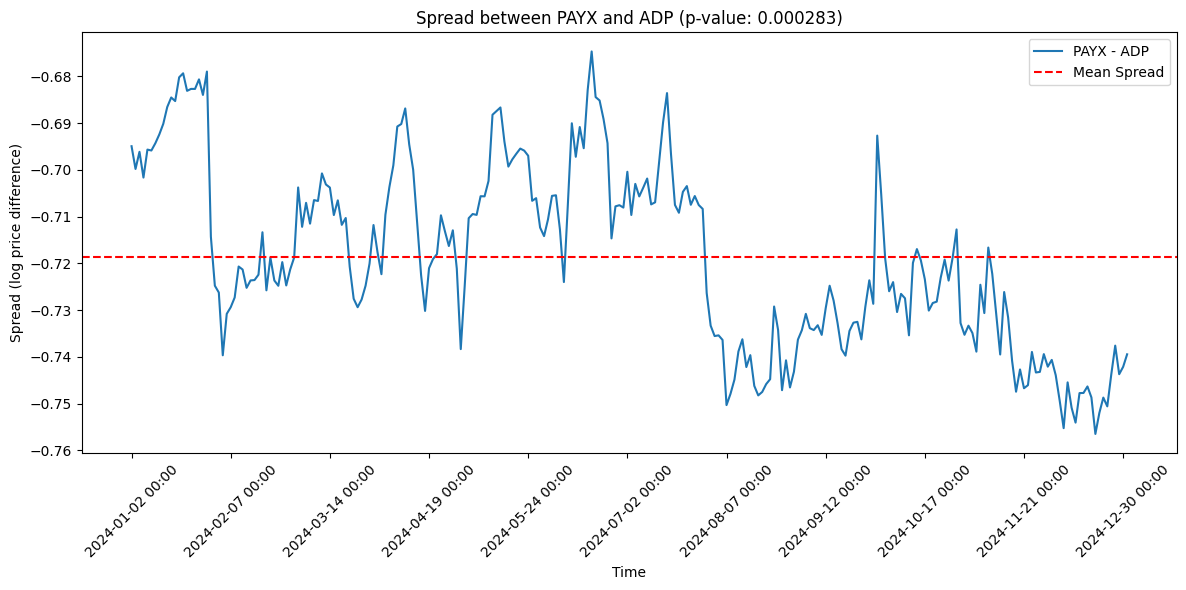

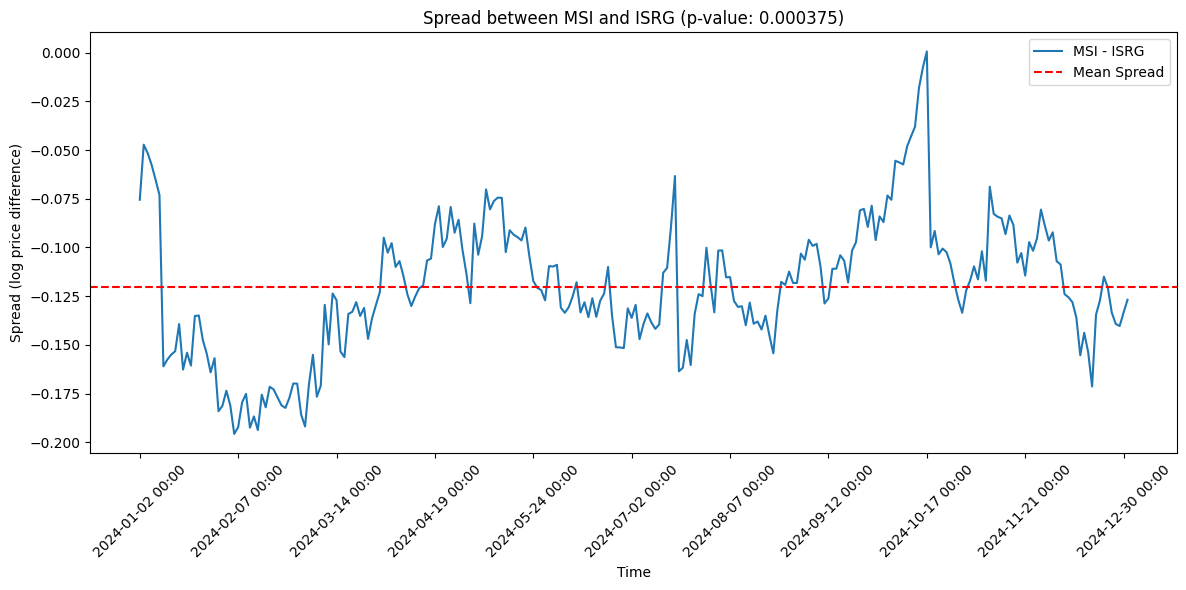

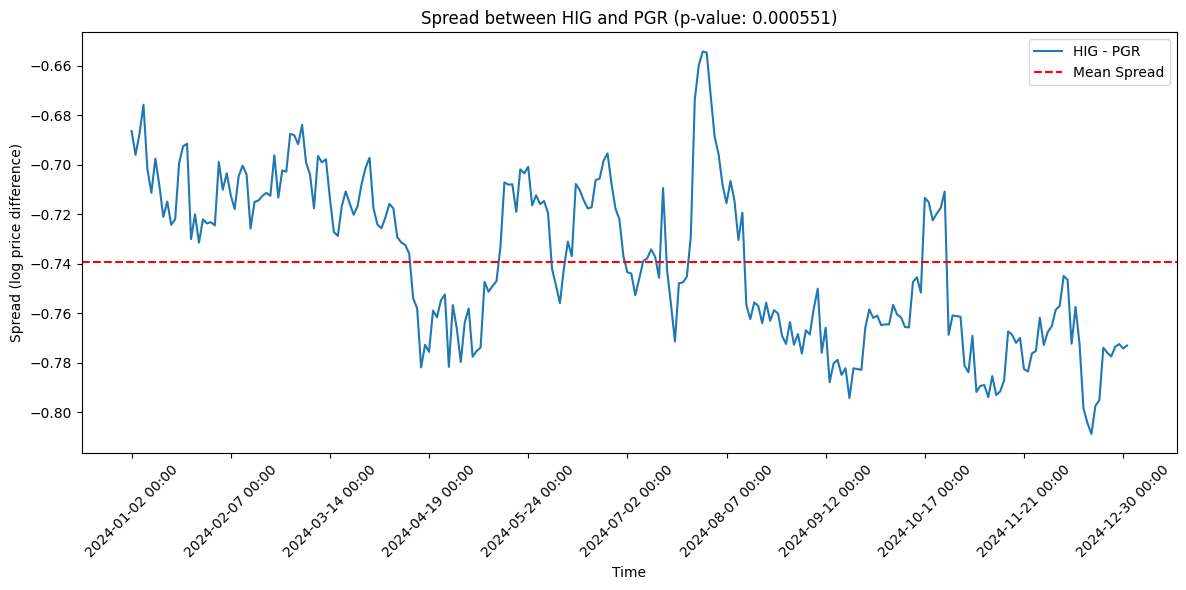

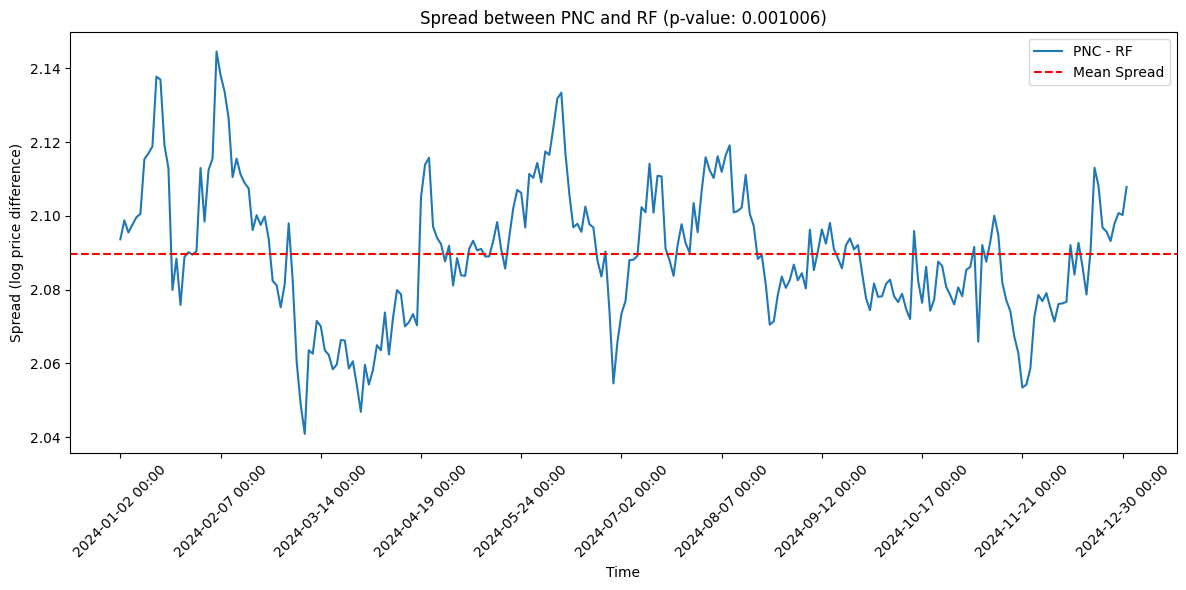

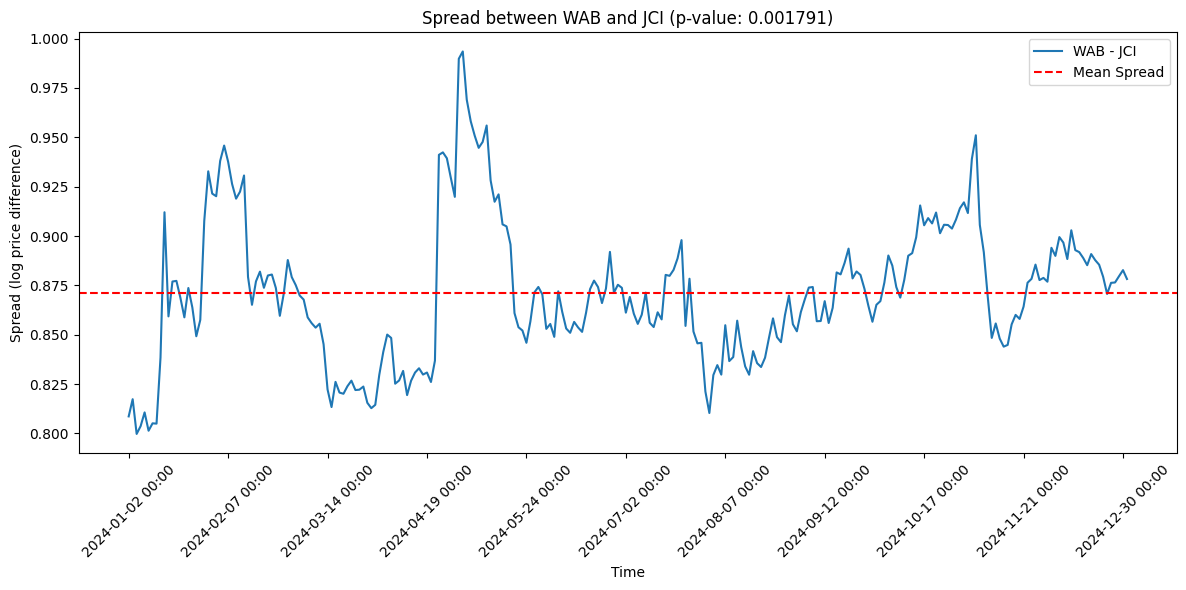

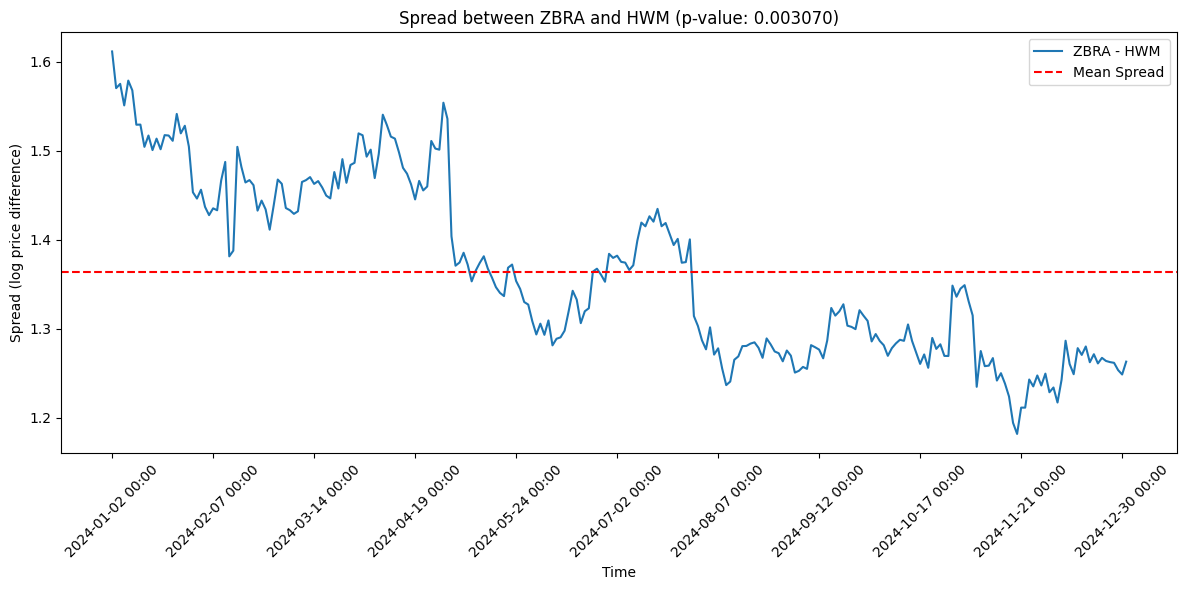

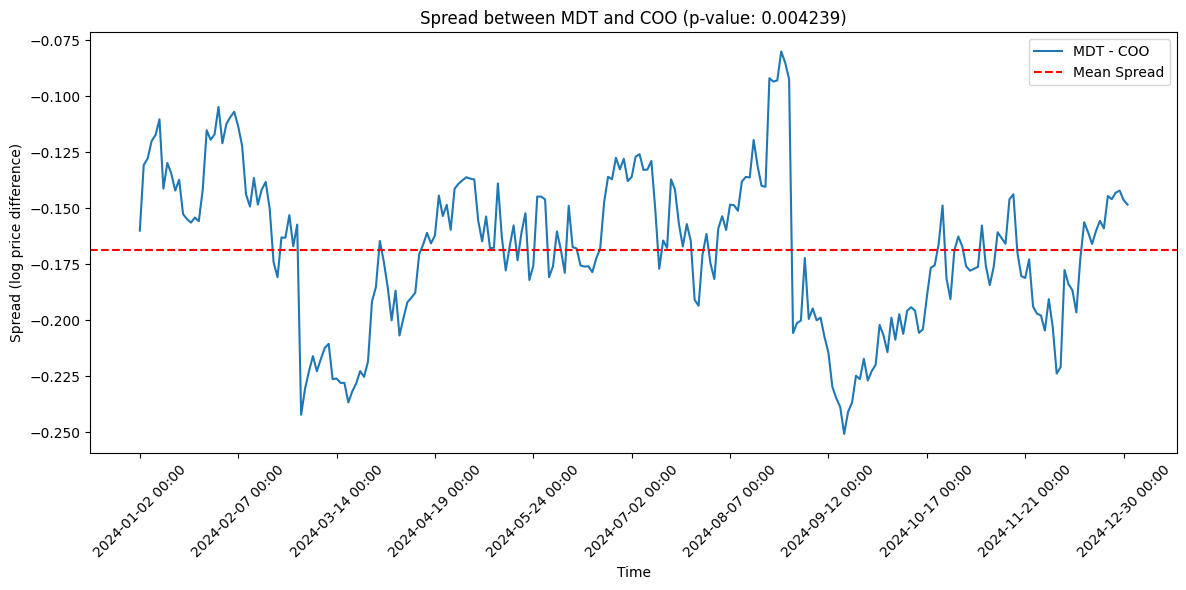

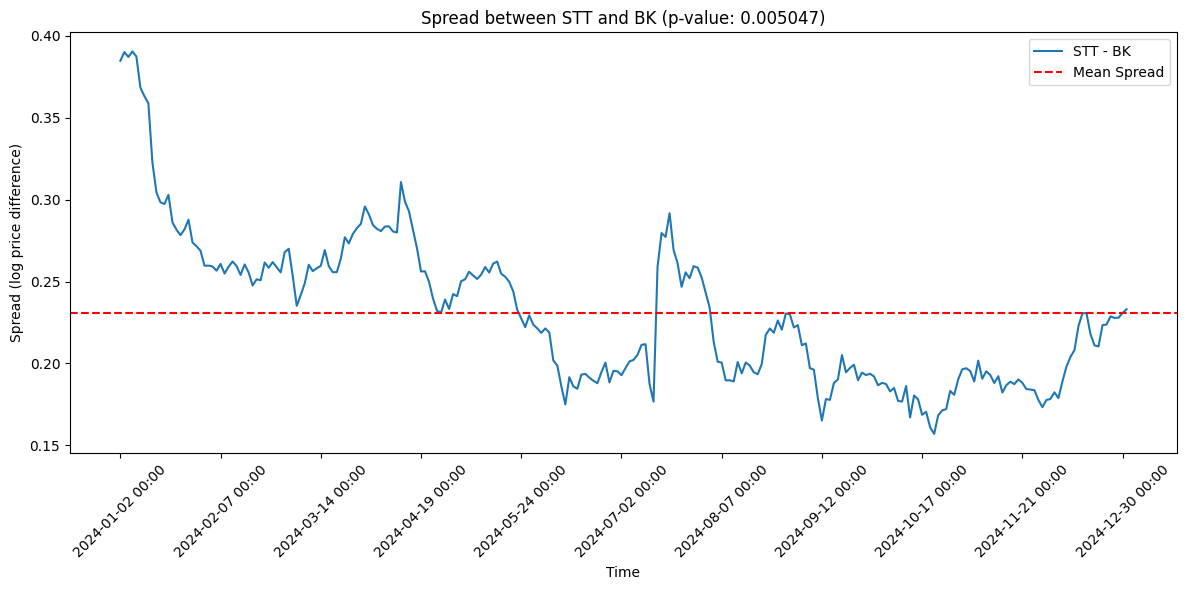

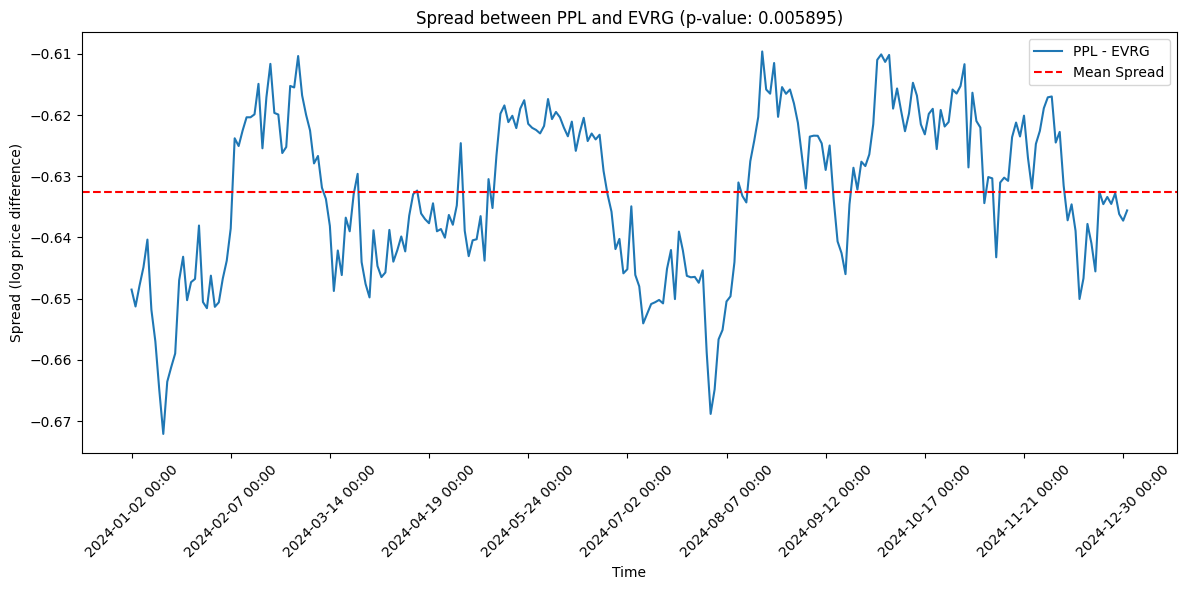

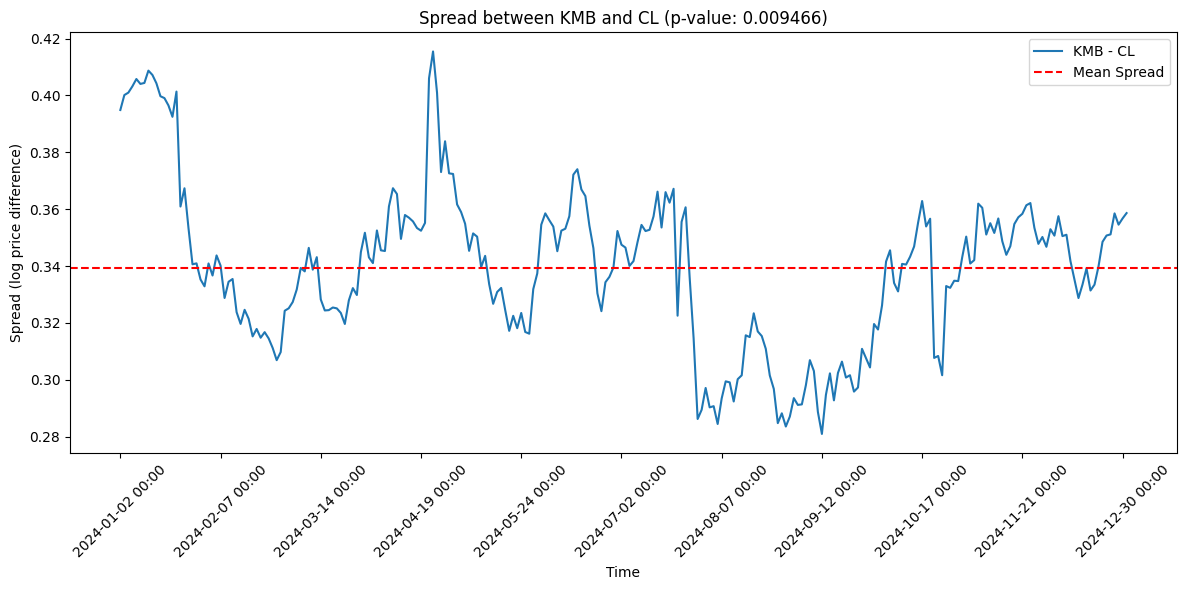

In [580]:
import matplotlib.pyplot as plt

for (ticker1, ticker2), result in sorted(cointegration_results.items(), key=lambda x: x[1]):
    p_value = result[1]
    if p_value < 0.01:
        spread = np.log(clean_data[ticker1]) - np.log(clean_data[ticker2])        
        # Convert index to string so matplotlib doesn’t interpret as continuous time
        x_vals = spread.index.strftime('%Y-%m-%d %H:%M')
        
        plt.figure(figsize=(12, 6))
        plt.plot(x_vals, spread.values, label=f"{ticker1} - {ticker2}")
        plt.title(f"Spread between {ticker1} and {ticker2} (p-value: {p_value:.6f})")
        plt.xlabel("Time")
        plt.ylabel("Spread (log price difference)")
        plt.axhline(spread.mean(), color='red', linestyle='--', label='Mean Spread')
        plt.xticks(ticks=range(0, len(x_vals), len(x_vals) // 10), labels=x_vals[::len(x_vals) // 10], rotation=45)
        plt.tight_layout()
        plt.legend()
        plt.show()